# Mundo 24

### Análise de dados

### Retornos: como calcular a rentabilidade das ações em qualquer período de tempo para analisar janelas de retornos contra o Ibovespa


In [1]:
import pandas as pd
import yfinance as yf

In [2]:
inicio = "2017-01-01"
fim = "2022-08-31"

dados_weg = yf.download("WEGE3.SA",inicio,fim)['Adj Close']

dados_weg

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02     5.274139
2017-01-03     5.539594
2017-01-04     5.406865
2017-01-05     5.392896
2017-01-06     5.438301
                ...    
2022-08-24    28.504648
2022-08-25    28.663063
2022-08-26    28.524448
2022-08-29    28.088812
2022-08-30    28.108612
Name: Adj Close, Length: 1410, dtype: float64

In [3]:
#retorno diário

dados_weg.pct_change()


Date
2017-01-02         NaN
2017-01-03    0.050331
2017-01-04   -0.023960
2017-01-05   -0.002584
2017-01-06    0.008419
                ...   
2022-08-24   -0.000347
2022-08-25    0.005558
2022-08-26   -0.004836
2022-08-29   -0.015272
2022-08-30    0.000705
Name: Adj Close, Length: 1410, dtype: float64

In [4]:
#retorno anual

dados_weg.resample("Y").last().pct_change().dropna()

Date
2018-12-31   -0.037392
2019-12-31    1.007020
2020-12-31    1.202823
2021-12-31   -0.119122
2022-12-31   -0.126355
Freq: A-DEC, Name: Adj Close, dtype: float64

In [5]:
#janela de retorno de 36 meses
dias = 252

dados_36m = dados_weg.pct_change(periods = dias).dropna()

dados_36m

Date
2017-12-28    0.627256
2017-12-29    0.549279
2018-01-02    0.647222
2018-01-03    0.626407
2018-01-04    0.597118
                ...   
2022-08-24   -0.186763
2022-08-25   -0.176982
2022-08-26   -0.178895
2022-08-29   -0.207438
2022-08-30   -0.215291
Name: Adj Close, Length: 1158, dtype: float64

<AxesSubplot: xlabel='Date'>

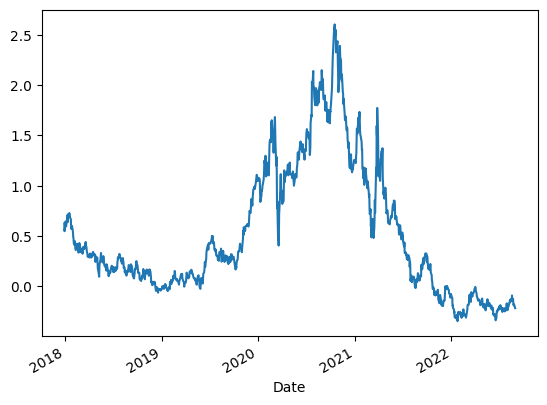

In [6]:
dados_36m.plot()

In [7]:
dados_mercado = yf.download(["^BVSP","WEGE3.SA"],inicio,fim)["Adj Close"]

dados_mercado

[*********************100%***********************]  2 of 2 completed


,WEGE3.SA,^BVSP
Date,,
2017-01-02,5.274139,59589.0
2017-01-03,5.539594,61814.0
2017-01-04,5.406865,61589.0
2017-01-05,5.392896,62071.0
2017-01-06,5.438301,61665.0
...,...,...
2022-08-24,28.504648,112898.0
2022-08-25,28.663063,113532.0
2022-08-26,28.524448,112299.0


In [8]:
dados_36m = dados_mercado.pct_change(periods = dias).dropna()

dados_36m

,WEGE3.SA,^BVSP
Date,,
2017-12-28,0.627256,0.282149
2017-12-29,0.549279,0.235998
2018-01-02,0.647222,0.264690
2018-01-03,0.626407,0.256545
2018-01-04,0.597118,0.275391
...,...,...
2022-08-24,-0.186763,-0.043667
2022-08-25,-0.176982,-0.033540
2022-08-26,-0.178895,-0.065818


<AxesSubplot: xlabel='Date'>

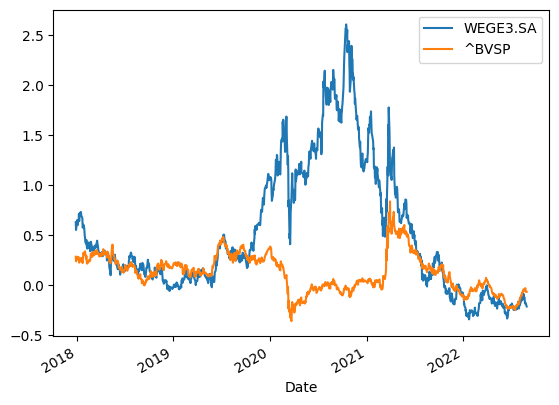

In [9]:
dados_36m.plot()

# Exercícios

* Exercício 79: Puxe as cotações de uma empresa a sua escolha e calcule o retorno diário e o retorno anual.
* Exercício 80: Compare as janelas de 12 meses de retorno de uma empresa escolhida pelo usuário com as janelas de 12 meses de retorno do ibovespa.

In [14]:
dados_exercicio = yf.download("WEGE3.SA")["Adj Close"]

dados_exercicio_diario = dados_exercicio.resample("D").last().pct_change().dropna()
dados_exercicio_diario

dados_exercicio_anual = dados_exercicio.resample("Y").last().pct_change().dropna()
dados_exercicio_anual

[*********************100%***********************]  1 of 1 completed


Date
2001-12-31    0.652541
2002-12-31    0.210257
2003-12-31    1.118644
2004-12-31    0.530001
2005-12-31   -0.019607
2006-12-31    0.733333
2007-12-31    0.938462
2008-12-31   -0.493687
2009-12-31    0.512028
2010-12-31    0.207582
2011-12-31   -0.112600
2012-12-31    0.473643
2013-12-31    0.183595
2014-12-31    0.304571
2015-12-31    0.003352
2016-12-31    0.063370
2017-12-31    0.585263
2018-12-31   -0.037392
2019-12-31    1.007020
2020-12-31    1.202823
2021-12-31   -0.119122
2022-12-31    0.188505
2023-12-31    0.043178
Freq: A-DEC, Name: Adj Close, dtype: float64

In [15]:
empresa = input("Qual empresa você quer analisar: ")

empresa = empresa + ".SA"

dados_mercado = yf.download(["^BVSP", empresa], inicio, final)['Adj Close']

retornos_12m = dados_mercado.pct_change(periods = 252).dropna()
retornos_12m.plot()

NameError: name 'final' is not defined